<a href="https://colab.research.google.com/github/feijuka/Teste_Analytics_MatheusHenriquesDeAzevedo./blob/main/script_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import random
from datetime import date, timedelta
n_registros = 100

# período para as datas das vendas
data_inicial = date(2023, 1, 1)
data_final = date(2023, 12, 31)

# lista de produtos com suas categorias e preços base
produtos = {
    'Notebook': {'categoria': 'Eletrônicos', 'preco': 4500.00},
    'Smartphone': {'categoria': 'Eletrônicos', 'preco': 3000.00},
    'Monitor': {'categoria': 'Eletrônicos', 'preco': 1000.00},
    'Teclado': {'categoria': 'Acessórios', 'preco': 250.00},
    'Mouse': {'categoria': 'Acessórios', 'preco': 150.00},
    'Fone de Ouvido': {'categoria': 'Acessórios', 'preco': 200.00},
    'Cadeira Gamer': {'categoria': 'Móveis', 'preco': 950.00},
    'Mesa de Escritório': {'categoria': 'Móveis', 'preco': 500.00},
    'Livro Python': {'categoria': 'Livros', 'preco': 80.00},
    'Livro R': {'categoria': 'Livros', 'preco': 75.00}
}

# lista de nomes de produtos para escolha aleatória
lista_produtos = list(produtos.keys())
#função para gerar datas aleatórias
def gerar_data_aleatoria(inicio, fim):
    delta = fim - inicio
    dias_aleatorios = random.randrange(delta.days + 1)
    return inicio + timedelta(days=dias_aleatorios)
# lista vazia para armazenar os registros de vendas
dados_vendas = []

print("Gerando dados de vendas...")

# loop para criar cada registro
for i in range(1, n_registros + 1):
    # escolhe um produto aleatório da lista
    produto_nome = random.choice(lista_produtos)

    # pega as informações associadas a esse produto
    produto_info = produtos[produto_nome]
    categoria = produto_info['categoria']
    preco = produto_info['preco']

    # gera os outros dados aleatoriamente
    id_venda = i
    data_venda = gerar_data_aleatoria(data_inicial, data_final)
    quantidade = random.randint(1, 3) # vendas de 1 a 5 unidades

    # adiciona o registro gerado à nossa lista
    dados_vendas.append({
        'ID': id_venda,
        'Data': data_venda,
        'Produto': produto_nome,
        'Categoria': categoria,
        'Quantidade': quantidade,
        'Preco': preco
    })

print("Dados gerados com sucesso!")


# converte a lista de dicionários em um DataFrame do Pandas
df_vendas = pd.DataFrame(dados_vendas)

# mostra as 5 primeiras linhas do dataset gerado
print("\n--- Amostra do Dataset Gerado ---\n")
print(df_vendas.head())

print("\n--- Executando rotinas de limpeza e validação ---")

df_limpo = df_vendas.copy()  #cópia

# assegura que a coluna 'Data' seja do tipo datetime.
df_limpo['Data'] = pd.to_datetime(df_limpo['Data'])

# tratamento de valores faltantes
df_limpo.dropna(inplace=True)

# remoção de duplicatas
df_limpo.drop_duplicates(inplace=True)

arquivo_csv = 'data_clean.csv'
df_limpo.to_csv(arquivo_csv, index=False, date_format='%Y-%m-%d')

print(f"\nDataset limpo salvo com sucesso no arquivo: '{arquivo_csv}'")
print("\n--- Iniciando Análise dos Dados ---")

# total de vendas por linha (Quantidade * Preço)
df_limpo['Total_Venda'] = df_limpo['Quantidade'] * df_limpo['Preco']

# total de vendas por produto
vendas_por_produto = df_limpo.groupby('Produto').agg(
    Qtde_Total=('Quantidade', 'sum'),
    Total_Venda=('Total_Venda', 'sum')
).sort_values(by='Total_Venda', ascending=False).reset_index()

print("\n--- Total de Vendas por Produto ---\n")
print(vendas_por_produto)

# produto com o maior número de vendas totais
produto_campeao = vendas_por_produto.iloc[0]

print("\n--- Produto com Maior Faturamento ---\n")
print(f"Produto: {produto_campeao['Produto']}")
print(f"Quantidade: {produto_campeao['Qtde_Total']}")
print(f"Valor Total Arrecadado: R$ {produto_campeao['Total_Venda']:.2f}")

Gerando dados de vendas...
Dados gerados com sucesso!

--- Amostra do Dataset Gerado ---

   ID        Data     Produto    Categoria  Quantidade   Preco
0   1  2023-04-26    Notebook  Eletrônicos           1  4500.0
1   2  2023-04-05     Monitor  Eletrônicos           1  1000.0
2   3  2023-09-03  Smartphone  Eletrônicos           1  3000.0
3   4  2023-06-26       Mouse   Acessórios           2   150.0
4   5  2023-10-27  Smartphone  Eletrônicos           3  3000.0

--- Executando rotinas de limpeza e validação ---

Dataset limpo salvo com sucesso no arquivo: 'data_clean.csv'

--- Iniciando Análise dos Dados ---

--- Total de Vendas por Produto ---

              Produto  Qtde_Total  Total_Venda
0          Smartphone          27      81000.0
1            Notebook          10      45000.0
2             Monitor          19      19000.0
3       Cadeira Gamer          15      14250.0
4  Mesa de Escritório          26      13000.0
5      Fone de Ouvido          36       7200.0
6             T

Arquivo 'data_clean.csv' lido da sessão com sucesso!


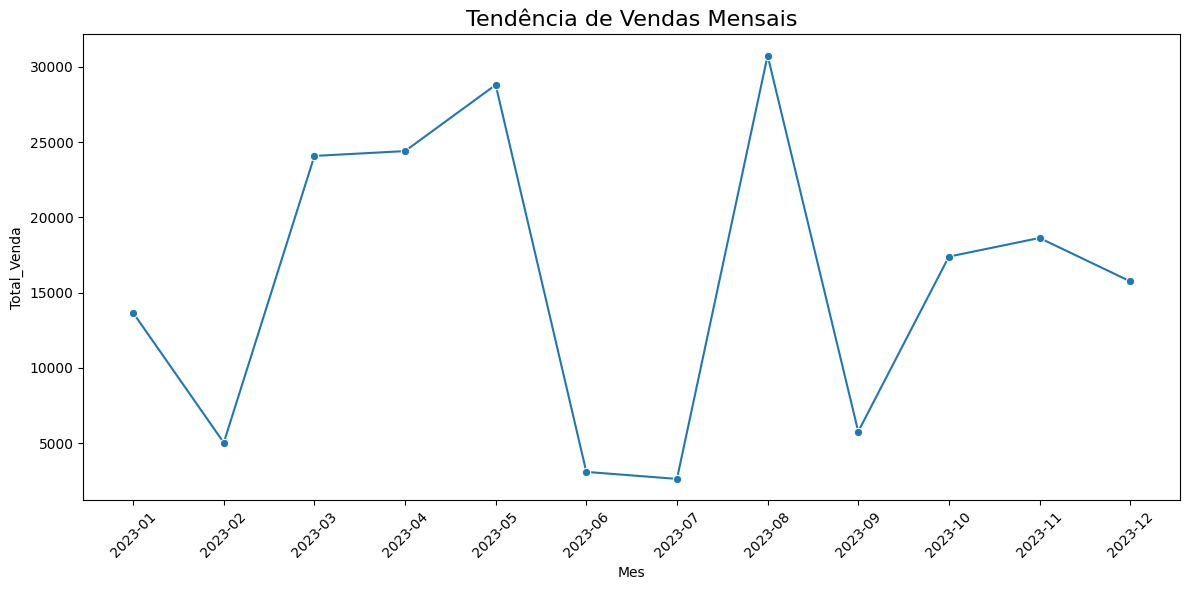

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nome_arquivo = 'data_clean.csv'

try:
    # lê o arquivo diretamente do ambiente da sessão
    df = pd.read_csv(nome_arquivo)
    print(f"Arquivo '{nome_arquivo}' lido da sessão com sucesso!")
except FileNotFoundError:
    print(f"ERRO: Arquivo '{nome_arquivo}' não encontrado.")
    print("Certifique-se de executar a célula anterior primeiro para gerar o arquivo.")
else:
    df['Data'] = pd.to_datetime(df['Data'])
    df['Total_Venda'] = df['Quantidade'] * df['Preco']

    # gráfico - tendências de venda
    df['Mes'] = df['Data'].dt.to_period('M').astype(str)
    vendas_mensais = df.groupby('Mes')['Total_Venda'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Mes', y='Total_Venda', data=vendas_mensais, marker='o', sort=False)
    plt.title('Tendência de Vendas Mensais', fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()